#  Introducción

Instacart es una plataforma de comercio electrónico especializada en la entrega de comestibles, que permite a los usuarios realizar pedidos en línea y recibirlos en su domicilio.

Este proyecto analiza el comportamiento de compra de los clientes a partir de un conjunto de datos relacional compuesto por múltiples tablas interconectadas (pedidos, productos, detalles de pedido, pasillos y departamentos). El objetivo es identificar patrones en la frecuencia de compra, tasas de recompra, popularidad de productos y distribución temporal de los pedidos, con el fin de comprender cómo interactúan los usuarios con la plataforma.

El análisis se desarrolla mediante un enfoque estructurado de Análisis Exploratorio de Datos (EDA). En la primera etapa se realiza la limpieza y validación de los datos, abordando valores ausentes, registros duplicados y verificando la coherencia entre las relaciones de las tablas. Posteriormente, se integran las distintas fuentes mediante operaciones de unión y agregación para examinar el comportamiento tanto a nivel de usuario como de producto.

Finalmente, los resultados se interpretan desde una perspectiva analítica orientada al negocio, identificando patrones que pueden aportar valor en estrategias de recomendación, segmentación de clientes, optimización de inventarios y toma de decisiones basada en datos.


## Data Overview



El dataset contiene cinco tablas relacionadas que modelan el comportamiento de compra en una plataforma de supermercado online:

Orders: información temporal y frecuencia de pedidos por usuario.

Products: catálogo de productos.

Order_Products: relación muchos-a-muchos entre pedidos y productos.

Aisles y Departments: jerarquía de categorías.

Las tablas se integran principalmente a través de:

order_id

product_id

aisle_id

department_id

## Preguntas de Análisis

Para orientar el análisis exploratorio, se plantean las siguientes preguntas:

1. ¿Cómo se distribuyen los pedidos a lo largo del tiempo (hora del día y día de la semana)?
2. ¿Existen patrones consistentes en la frecuencia de compra de los usuarios?
3. ¿Qué productos presentan mayores tasas de recompra?
4. ¿Se pueden identificar categorías con mayor concentración de demanda?
5. ¿Qué características distinguen a los clientes con mayor nivel de actividad?

Estas preguntas guiarán el proceso de exploración y permitirán estructurar los hallazgos de manera coherente y orientada a la toma de decisiones.

In [ ]:
import pandas as pd 

In [4]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# leer conjuntos de datos en los DataFrames

In [6]:
print(orders.columns)
print(orders.isnull().sum())

# mostrar información del DataFrame

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [8]:
print(products.head())
print(products.columns)
print(products.isnull().sum())

# mostrar información del DataFrame

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [9]:
print(aisles.head())
print(aisles.columns)
print(aisles.isnull().sum())

# mostrar información del DataFrame

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
Index(['aisle_id', 'aisle'], dtype='object')
aisle_id    0
aisle       0
dtype: int64


In [33]:
print(departments.head())
print(departments.columns)
print(departments.isnull().sum())

# mostrar información del DataFrame

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
Index(['department_id', 'department'], dtype='object')
department_id    0
department       0
dtype: int64


In [53]:
print(order_products.head())
print(order_products.columns)
print(order_products.isnull().sum())

# mostrar información del DataFrame

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


### `orders` data frame

In [ ]:
print("Duplicados en 'orders':", orders.duplicated().sum())

Duplicados en 'orders': 15


In [ ]:
up_check = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print("Pedidos el miércoles a las 2:00 a.m.:", up_check.shape)

Pedidos el miércoles a las 2:00 a.m.: (121, 6)


Se identificaron registros duplicados en el DataFrame `orders`, los cuales comparten el mismo `order_id`, `order_dow` y `order_hour_of_day`. Esto sugiere...

In [ ]:
orders.drop_duplicates(inplace=True)
print("Duplicados tras limpieza:", orders.duplicated().sum())


Duplicados tras limpieza: 0


In [ ]:
products[(~products['product_name'].isna()) & products['product_name'].duplicated()]
print("Pedidos con ID duplicado:", orders.duplicated(subset='order_id').sum())


Pedidos con ID duplicado: 15


In [ ]:
print("Duplicados en 'orders':", orders.duplicated().sum())

Duplicados en 'orders': 0


### `products` data frame

In [ ]:
print("Duplicados en 'products':", products.duplicated().sum())

Duplicados en 'products': 0


In [ ]:
print("IDs de departamento duplicados:", departments.duplicated(subset='department_id').sum())

IDs de departamento duplicados: 0


In [ ]:
products_upper = products[~products['product_name'].isna()].copy()
products_upper['product_name_upper'] = products_upper['product_name'].str.upper()

duplicados_mayus = products_upper[products_upper.duplicated(subset='product_name_upper')]

print("Duplicados por nombre de producto en mayúsculas (ignorando nulos):", duplicados_mayus.shape[0])


Duplicados por nombre de producto en mayúsculas (ignorando nulos): 104


In [ ]:
print("IDs de departamento duplicados:", departments.duplicated(subset='department_id').sum())


IDs de departamento duplicados: 0


### `departments` data frame

In [ ]:
print("Total Duplicados en'departments':", departments.duplicated().sum())

Total Duplicados en'departments': 0


In [ ]:
print("IDs de products duplicados:", products.duplicated(subset='product_id').sum())

IDs de products duplicados: 0


`aisles` data frame

In [ ]:
print("Total duplicados en 'aisles':", aisles.duplicated().sum())

Total duplicados en 'aisles': 0


In [ ]:
print("IDs duplicados:", aisles.duplicated(subset='aisle_id').sum())

IDs duplicados: 0


`order_products` data frame

In [ ]:
print("Total duplicados en 'order_products':", order_products.duplicated().sum())

Total duplicados en 'order_products': 0


In [ ]:
duplicated_pairs = order_products.duplicated(subset=['order_id', 'product_id'], keep=False)
print("Posibles duplicados por par (order_id, product_id):", duplicated_pairs.sum())

Posibles duplicados por par (order_id, product_id): 0


### `products` data frame

In [ ]:
missing_products = products[products['product_name'].isna()]
print("Productos ausentes:", missing_products.shape[0])

Productos ausentes: 1258


In [ ]:
print("¿Están todos los productos ausentes en el pasillo con ID 100?:", missing_products['aisle_id'].nunique() == 1 and missing_products['aisle_id'].iloc[0] == 100)

¿Están todos los productos ausentes en el pasillo con ID 100?: True


In [ ]:
print(" ¿Están todos en el departamento con ID 21?:", missing_products['department_id'].nunique() == 1 and missing_products['department_id'].iloc[0] == 21)

 ¿Están todos en el departamento con ID 21?: True


In [ ]:
print("Pasillo 100:", aisles[aisles['aisle_id'] == 100])
print("Departamento 21:", departments[departments['department_id'] == 21])

Pasillo 100:     aisle_id    aisle
99       100  missing
Departamento 21:     department_id department
20             21    missing


In [ ]:
products['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [ ]:
print("Valores ausentes en 'days_since_prior_order':", orders['days_since_prior_order'].isna().sum())

# Encuentra los valores ausentes

Valores ausentes en 'days_since_prior_order': 28817


In [ ]:
missing_days = orders[orders['days_since_prior_order'].isna()]
print("¿Coincide con el primer pedido del usuario?:", (missing_days['order_number'] == 1).all())

¿Coincide con el primer pedido del usuario?: True


### `order_products` data frame

In [ ]:
print("Valores ausentes:", order_products['add_to_cart_order'].isna().sum())

# Valores ausentes

Valores ausentes: 836


In [ ]:
print("Mínimo:", order_products['add_to_cart_order'].min())
print("Máximo:", order_products['add_to_cart_order'].max())


# Valores min - max. 


Mínimo: 1.0
Máximo: 64.0


In [ ]:
missing_add_cart = order_products[order_products['add_to_cart_order'].isna()]
missing_order_ids = missing_add_cart['order_id'].unique()
print("Pedidos con datos ausentes:", len(missing_order_ids))

Pedidos con datos ausentes: 70


In [ ]:
grouped_missing = order_products[order_products['order_id'].isin(missing_order_ids)].groupby('order_id')['product_id'].count()
print("Número minimo  de productos por pedido con datos ausentes:", grouped_missing.min())



Mínimo número de productos por pedido con datos ausentes: 65


In [ ]:
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)


### Verificar que los valores sean sensibles

In [ ]:
hour_check = orders['order_hour_of_day'].between(0, 23).all()
dow_check = orders['order_dow'].between(0, 6).all()

print("¿'order_hour_of_day' está entre 0 y 23?:", hour_check)
print("¿'order_dow' está entre 0 y 6?:", dow_check)


¿'order_hour_of_day' está entre 0 y 23?: True
¿'order_dow' está entre 0 y 6?: True


### Para cada hora del día, ¿cuántas personas hacen órdenes?

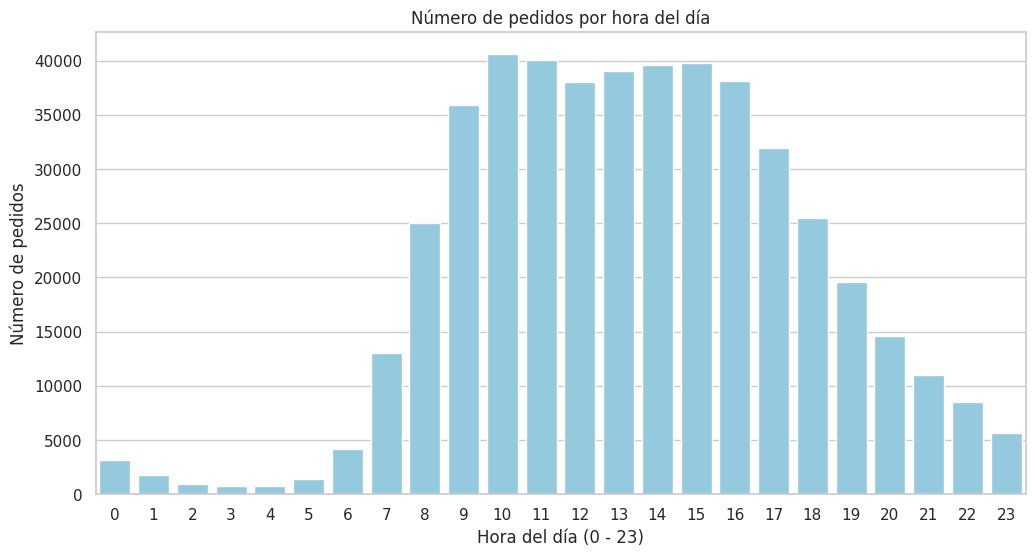

In [77]:
# Contar órdenes por hora
hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, color='skyblue')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día (0 - 23)')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24))
plt.show()


### ¿Qué día de la semana compran víveres las personas?

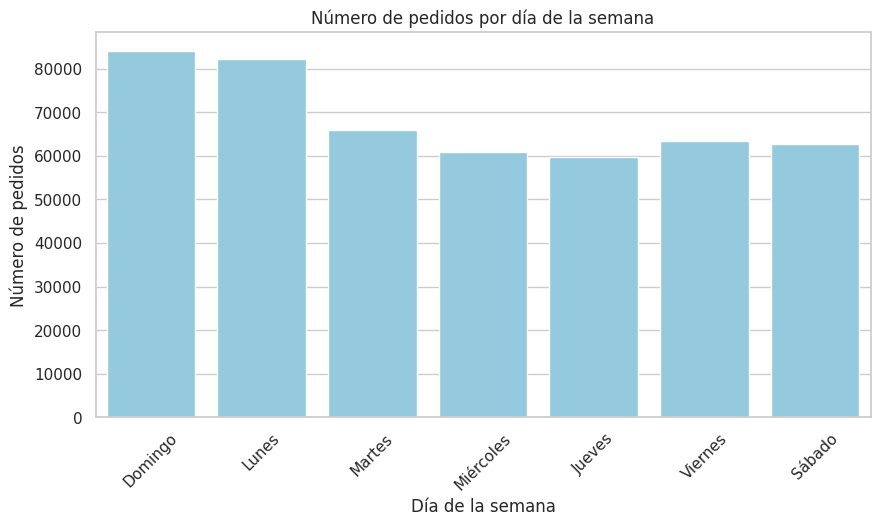

In [80]:
# Contar órdenes por día de la semana
dow_orders = orders['order_dow'].value_counts().sort_index()

# Nombres de los días (0=Domingo)
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=dias_semana, y=dow_orders.values, color='skyblue')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.show()


### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

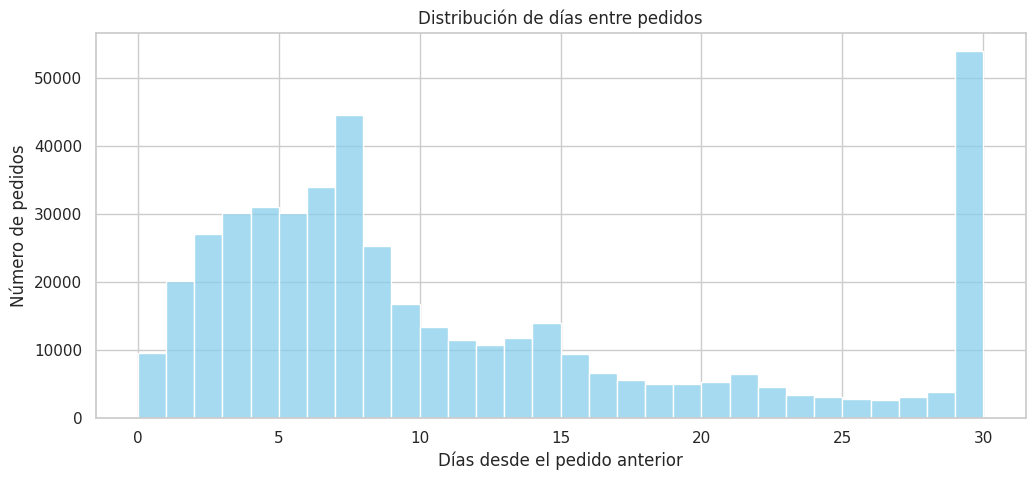

Valor mínimo: 0.0 días
Valor máximo: 30.0 días


In [82]:
# Verificar valores mínimos y máximos (ignorando NaN)
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()

# Gráfico
plt.figure(figsize=(12, 5))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Distribución de días entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.show()

print(f"Valor mínimo: {min_days} días")
print(f"Valor máximo: {max_days} días")


### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

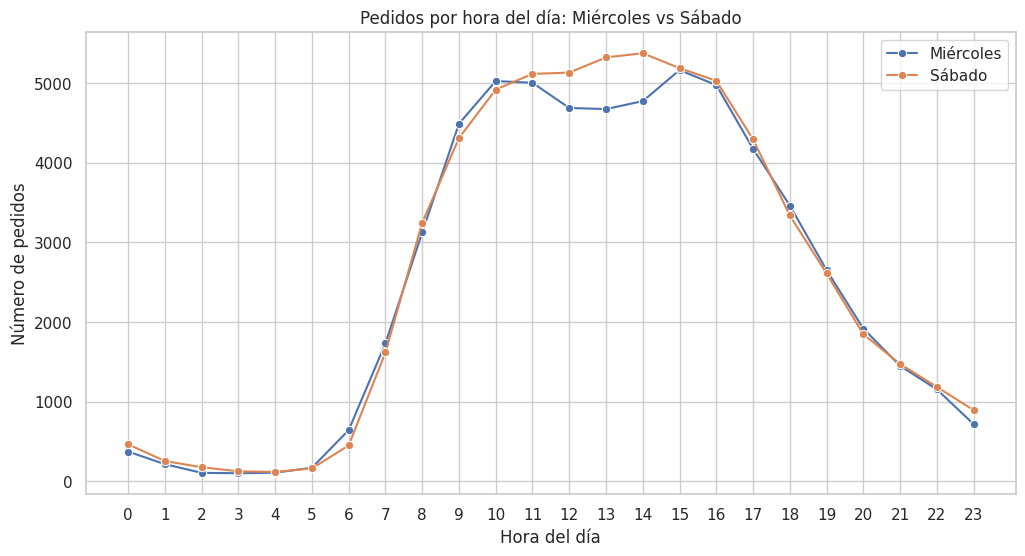

In [85]:
# Filtrar órdenes hechas el miércoles (3) y sábado (6)
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

# Agrupar por hora
wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Graficar en la misma figura
plt.figure(figsize=(12, 6))
sns.lineplot(x=wednesday_counts.index, y=wednesday_counts.values, label='Miércoles', marker='o')
sns.lineplot(x=saturday_counts.index, y=saturday_counts.values, label='Sábado', marker='o')

plt.title('Pedidos por hora del día: Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24))
plt.legend()
plt.show()


### ¿Cuál es la distribución para el número de pedidos por cliente?

In [88]:
# Contar la cantidad de pedidos por usuario
user_order_counts = orders.groupby('user_id')['order_number'].max()

# Graficar
plt.figure(figsize=(12, 6))
sns.histplot(user_order_counts, bins=30, kde=False, color='skyblue
             ')
plt.title('Distribución de cantidad de pedidos por cliente')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Número de clientes')
plt.show()


SyntaxError: EOL while scanning string literal (722701176.py, line 6)

### Los 20 productos más populares

In [91]:
# Contar cuántas veces se pidió cada producto
top_products = order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame de productos para obtener los nombres
top_products_df = top_products.reset_index().rename(columns={'index': 'product_id', 'product_id': 'order_count'})
top_products_df = top_products_df.merge(products[['product_id', 'product_name']], on='product_id')

# Mostrar resultados
print(top_products_df[['product_id', 'product_name', 'order_count']])


    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

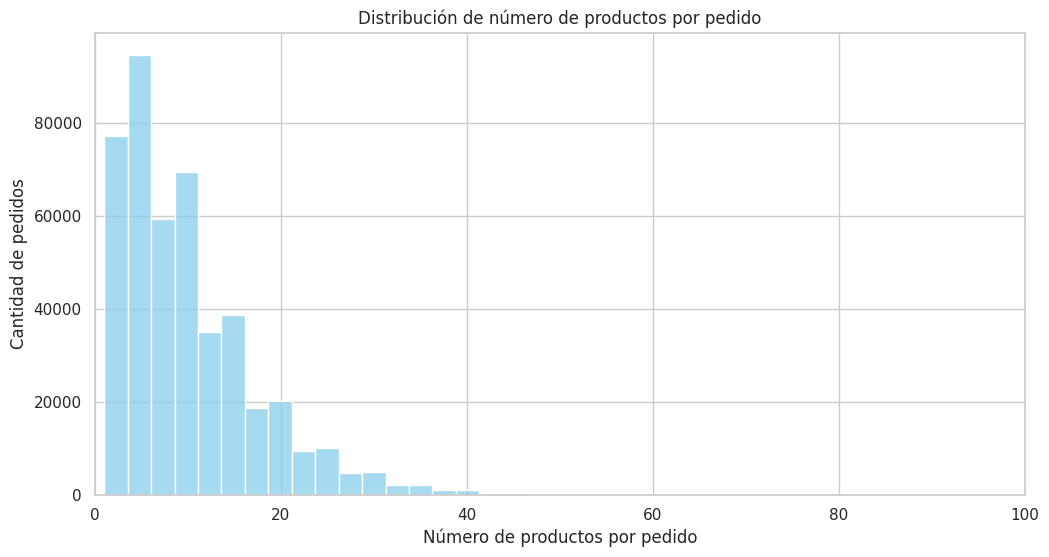

In [94]:
# Contar productos por pedido
products_per_order = order_products.groupby('order_id')['product_id'].count()

# Graficar distribución
plt.figure(figsize=(12, 6))
sns.histplot(products_per_order, bins=50, kde=False, color='skyblue')
plt.title('Distribución de número de productos por pedido')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Cantidad de pedidos')
plt.xlim(0, 100)
plt.show()


### 20 principales artículos con mayor frecuencia

In [100]:
reordered_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)

In [ ]:
reordered_df = reordered_counts.reset_index().rename(columns={'index': 'product_id', 'product_id': 'reorder_count'})

In [102]:
reordered_df = reordered_df.merge(products[['product_id', 'product_name']], on='product_id')

In [103]:
print(reordered_df[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

###  Proporción de recompra por producto

In [104]:
# Calcular total de pedidos y reordenes por producto
product_reorders = order_products.groupby('product_id')['reordered'].agg(['sum', 'count'])
product_reorders['reorder_rate'] = product_reorders['sum'] / product_reorders['count']

In [ ]:
# Mostrar los productos con mayor tasa de reorden en 100 pedidos.
top_reorder_rate = product_reorders[product_reorders['count'] > 100].sort_values('reorder_rate', ascending=False).head(10)
top_reorder_rate = top_reorder_rate.merge(products[['product_id', 'product_name']], left_index=True, right_on='product_id')

In [106]:
# Imprimir los pedidos reordenados
print(top_reorder_rate[['product_id', 'product_name', 'reorder_rate']])

       product_id                       product_name  reorder_rate
9291         9292    Half And Half Ultra Pasteurized      0.876574
2676         2677  Yerba Mate Sparkling Classic Gold      0.871345
47230       47231               Ultra-Purified Water      0.868293
1156         1157               Wheat Sandwich Bread      0.863946
45503       45504         Whole Organic Omega 3 Milk      0.863142
29446       29447           Milk- Organic- Vitamin D      0.862847
34196       34197                          Goat Milk      0.859135
5513         5514     Organic Homogenized Whole Milk      0.857664
31719       31720                Organic  Whole Milk      0.855137
24520       24521                   Lowfat Goat Milk      0.853801


### Cálculo de la proporción de productos previamente adquiridos por cada cliente.

In [107]:
# Unir con datos de pedidos
merged = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

In [108]:
# Calcular por usuario la tasa de productos reordenados
user_reorders = merged.groupby('user_id')['reordered'].agg(['sum', 'count'])
user_reorders['user_reorder_rate'] = user_reorders['sum'] / user_reorders['count']

# Mostrar estadística
print(user_reorders['user_reorder_rate'].describe())

count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: user_reorder_rate, dtype: float64


### Principales 20 artículos agregados primero al carrito.

In [110]:
# Filtrar solo productos que fueron el primer ítem en el carrito
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

In [111]:
# Unir con nombres
first_in_cart_df = first_in_cart.reset_index().rename(columns={'index': 'product_id', 'product_id': 'first_count'})
first_in_cart_df = first_in_cart_df.merge(products[['product_id', 'product_name']], on='product_id')

In [112]:
# Mostrar el resultado
print(first_in_cart_df[['product_id', 'product_name', 'first_count']])

    product_id                 product_name  first_count
0        24852                       Banana        15562
1        13176       Bag of Organic Bananas        11026
2        27845           Organic Whole Milk         4363
3        21137         Organic Strawberries         3946
4        47209         Organic Hass Avocado         3390
5        21903         Organic Baby Spinach         3336
6        47766              Organic Avocado         3044
7        19660                 Spring Water         2336
8        16797                 Strawberries         2308
9        27966          Organic Raspberries         2024
10       44632   Sparkling Water Grapefruit         1914
11       49235          Organic Half & Half         1797
12       47626                  Large Lemon         1737
13         196                         Soda         1733
14       38689     Organic Reduced Fat Milk         1397
15       26209                        Limes         1370
16       12341                H

### Conclusion general



Este análisis permitió entender mejor cómo compran los usuarios dentro de la plataforma. Se observan patrones claros en los horarios de mayor actividad, productos que se repiten con frecuencia y comportamientos relativamente consistentes entre pedidos.

La recurrencia en ciertos productos sugiere que los clientes mantienen hábitos de compra bastante estables, lo que abre oportunidades para sistemas de recomendación o promociones personalizadas. Además, los momentos de mayor volumen podrían aprovecharse estratégicamente para campañas o ajustes operativos.

En conjunto, el análisis muestra cómo, a partir de datos aparentemente simples, es posible identificar patrones útiles para apoyar decisiones en un entorno de comercio electrónico.